# Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

n_classes = 3

X, Y = make_classification(n_samples=2000, n_features=10, n_classes=n_classes, n_informative=3)

---------------

# Visualize

In [2]:
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt

In [3]:
n = 2
x_pca =  np.expand_dims(PCA(n_components=n).fit_transform(X), axis=0)
x_tsne = np.expand_dims(TSNE(n_components=n).fit_transform(X), axis=0)
x_iso =  np.expand_dims(Isomap(n_components=n).fit_transform(X), axis=0)
x_umap = np.expand_dims(UMAP(n_components=n).fit_transform(X), axis=0)

In [4]:
transformed_data = np.concatenate((x_pca, x_tsne, x_iso, x_umap), axis=0)

In [5]:
plot_para ={'alpha':0.7, 'cmap':'viridis', 'edgecolors':'grey', 's':25}
method_name = ['PCA', 'TSNE', 'Isomap', 'UMAP']

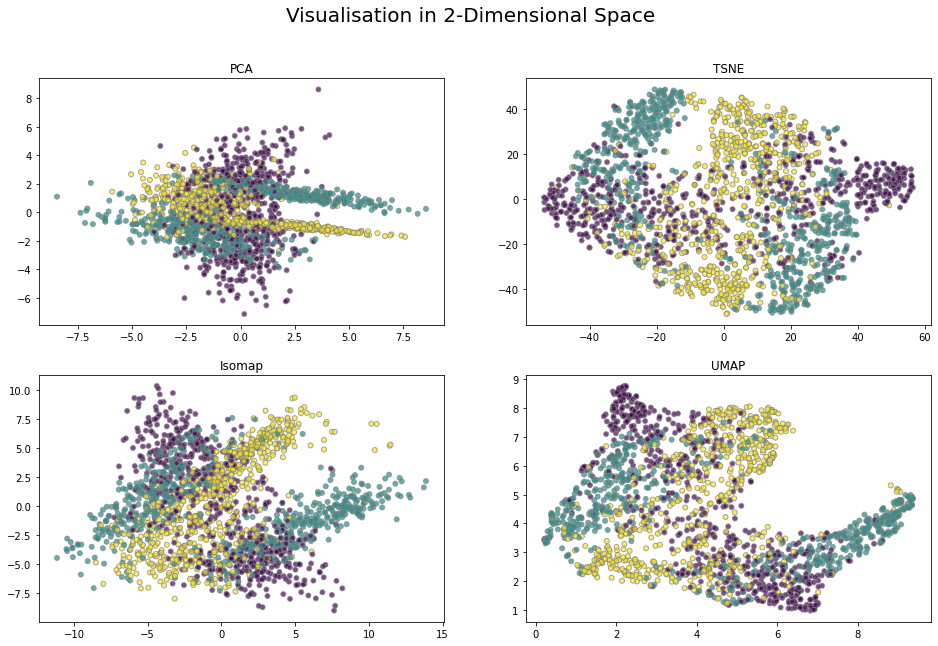

In [6]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Visualisation in 2-Dimensional Space', fontsize=20)
for i, ax in enumerate(axes.flat):
    ax.scatter(transformed_data[i,:,0], transformed_data[i,:,1], c=Y, **plot_para)
    ax.set_title(method_name[i])

-----------

# Classification

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## Cross-validation

In [8]:
from sklearn.model_selection import StratifiedKFold

seed = 10

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

### Performance on cross-validation

In [10]:
cvscores_knn = []

for train, test in kfold.split(X, Y):
    x_train = sc.fit_transform(X[train])
    x_test = sc.fit_transform(X[test])
    knn.fit(x_train, Y[train])
    score = np.round(knn.score(x_test, Y[test]), decimals=3)
    cvscores_knn.append(score)
    print(score*100)

69.69999999999999
68.2
67.60000000000001


### ROC

**OVA 1 vs all**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (n_classes):
    y_ = Y.copy()
    y_ = (y_ == i).astype(int)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y_, test_size=0.25, random_state=42)

    scaled_x_train = sc.fit_transform(x_train)
    scaled_x_test = sc.fit_transform(x_test)

    knn.fit(scaled_x_train, y_train)
    y_predict = knn.predict_proba(x_test)

    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

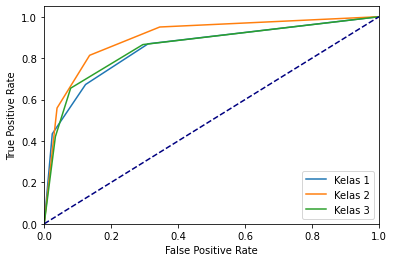

In [13]:
#args = {'color':'orange', 'lw':1}

plt.figure()
#lw = 2
#for i in range (n_classes):
plt.plot(fpr[0], tpr[0], label='Kelas 1')
plt.plot(fpr[1], tpr[1], label='Kelas 2')
plt.plot(fpr[2], tpr[2], label='Kelas 3')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [14]:
np.array([roc_auc[k] for k in roc_auc]).mean()

0.8676768843486

$$AUC \approx 0.87$$